In [882]:

import agentpy as ap


class Pessoa(ap.Agent):
    def setup(self):
        self.opinion = self.model.nprandom.choice([0, 1, 2])
        self.role = None
        self.record(('opinion', self.opinion))

    def setup_roles(self):
        if self.role == "regular":
            self.resistance = self.model.random.random()
            self.persuasion = self.model.random.random()
        elif self.role == "influencer":
            self.resistance = self.model.random.uniform(0.7, 1)
            self.persuasion = self.model.random.uniform(0.7, 1)
         
    def send_message(self, receiver, performative, content):
          message = {
              'performative': performative,
              'sender': self,
              'receiver': receiver,
              'content': content
          }
          receiver.receive_message(message)

    def receive_message(self, message):
        if message['performative'] == 'inform':
          self.process_message(message)

    def process_message(self, message):
        other_opinion, other_persuasion = message["content"].split(",")

        other_opinion = int(other_opinion)
        other_persuasion = float(other_persuasion)

        if self.opinion != other_opinion:
          
            if self.model.random.random() <= ((1 - self.resistance) * (1 + other_persuasion)):
                    self.opinion = other_opinion
                    self.record('opinion', self.opinion)



In [883]:
import networkx as nx


class SocialModel(ap.Model):
    def setup(self):
        self.agents = ap.AgentList(self,  self.p.population, Pessoa)
        self.__create_groups()
        self.network = self.agents.network = self.__created_scale_free_network()
        self.agents.setup_roles()
        

    def step(self):
        for agent in self.agents:
            for other_agent in self.network.neighbors(agent):
                print(other_agent)
                agent.send_message(receiver = other_agent, performative = "inform", content = f"{agent.opinion},{agent.persuasion}")

    
    def __create_groups(self):
        self.influencer_group = ap.AgentList(self)  # Cria uma nova lista de agentes para o grupo 1
        self.regular_group = ap.AgentList(self)  # Cria uma nova lista de agentes para o grupo 2
    
        inf_qty = int(self.p.influencer_per * self.p.population)
        inf_agents = self.agents.random(inf_qty)

        self.influencer_group.extend(inf_agents)

        reg_agents = [agent for agent in self.agents if agent not in self.influencer_group]
        self.regular_group.extend(reg_agents)

        self.influencer_group.role = "influencer"
        self.regular_group.role = "regular"

        
    def __created_scale_free_network(self):
        degrees = []


        for agent in self.agents:
            if agent in self.influencer_group:
                degrees.append(int(self.p.population / 3))
            elif agent in self.regular_group:
                degrees.append(np.random.randint(1, 10))

        if sum(degrees) % 2 != 0:
            degrees[np.random.randint(0, self.p.population)] += 1

        graph = nx.configuration_model(degrees)  
        graph = nx.Graph(graph) 
        graph.remove_edges_from(nx.selfloop_edges(graph))

        network = ap.Network(self, graph)
        network.add_agents(self.agents, network.nodes)

        print(len(self.agents))
        # for agent in self.agents:
        #     agent.vizinhos = len(list(network.neighbors(agent)))

        return network

    
    def __create_random_network(self):
        graph = nx.erdos_renyi_graph(
            self.p.population,
            0.2, 
            42
        )

        return ap.Network(self, graph)
                


In [884]:
parameters = {  
    'population': 50,
    'steps': 20,
    'influencer_per': 0.05,
}

In [885]:
model = SocialModel(parameters)

In [886]:
results = model.run()

50
Pessoa (Obj 36)
Pessoa (Obj 20)


TypeError: attribute name must be string, not 'int'

In [724]:
import re

import matplotlib.pyplot as plt


def animation_plot(m, ax):

    ax.set_title("Animacao")
    
    
    # Plot network on second axis
    color_dict = {0:'b', 1:'r', 2:'g'}
    colors = [color_dict[c] for c in m.agents.opinion]

    labels = {}
    for agent, _ in m.network.graph.nodes(data=True):
        labels[agent] = re.search('\d+',str(agent)).group(0)

    sizes = [s * 10 for s in m.agents.vizinhos]
    nx.draw_kamada_kawai(m.network.graph, node_color=colors, node_size=sizes, ax=ax,with_labels = True, labels = labels,font_color="purple", horizontalalignment= "right")
    # nx.draw_circular(m.network.graph, node_color=colors, node_size=sizes, ax=ax)

fig, axs = plt.subplots(1, 1, figsize=(10, 10)) 
animation = ap.animate(SocialModel(parameters), fig, axs, animation_plot)

In [725]:
import IPython

IPython.display.HTML(animation.to_jshtml()) 

In [754]:
import random

random.uniform(0.7, 1)

0.9566395978725099

In [605]:
import numpy as np
from scipy.stats import powerlaw

alpha = 2  
size = 100

random_numbers = powerlaw.rvs(alpha, size=size)
int_numbers = np.floor(random_numbers * 10).astype(int)


print(list(int_numbers))


[9, 1, 5, 7, 9, 6, 7, 9, 7, 9, 3, 8, 4, 0, 8, 9, 6, 4, 8, 4, 3, 8, 9, 9, 9, 5, 4, 9, 9, 5, 6, 7, 8, 7, 9, 9, 8, 4, 5, 8, 4, 5, 6, 9, 3, 9, 5, 7, 9, 4, 5, 6, 8, 8, 7, 2, 2, 4, 7, 7, 9, 8, 9, 3, 9, 7, 7, 6, 4, 0, 3, 5, 5, 5, 6, 7, 2, 6, 6, 9, 8, 5, 3, 7, 2, 8, 8, 5, 9, 3, 4, 9, 4, 8, 9, 3, 5, 5, 7, 9]


In [606]:
# random_numbers

In [607]:
a = powerlaw.rvs(0.5, size=1000) 

<Axes: ylabel='Count'>

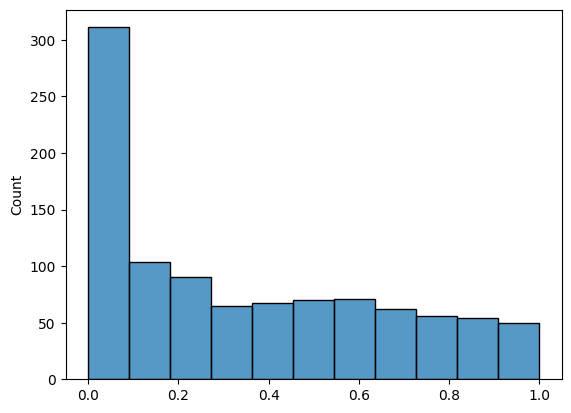

In [608]:
import seaborn as sns

sns.histplot(a)